# Fruit recognition

## Chargement des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as im
import sklearn as sk
import glob
import os
import datetime as dt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

## Chargement des données (train)

In [ ]:
tabImg=pd.DataFrame()
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
label = []
root_dir=os.getcwd()+"\\data\\train\\"

for filename in glob.iglob(root_dir+'**\\*.jpg',recursive=True):
    img=im.imread(filename)
    img=img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
    
    fruit_name=filename.split('\\')[-2]
    
    label.append(categories.index(fruit_name))
    tabImg=tabImg.append(pd.Series(img),ignore_index=True)
tabImg['label']=label

In [ ]:
tabImg.shape

In [ ]:
tabImg.to_csv('train.csv',index=False)

In [ ]:
np.save('train.npy', tabImg)

In [ ]:
tabImg.head(5)

## Récupération des données (train)

In [2]:
#tab=pd.read_csv('train.csv')
tab = np.load('train.npy', allow_pickle=True)

In [3]:
print(tab.shape)
tab=pd.DataFrame(tab)

(16854, 30001)


In [4]:
tab.head(5)

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,246.0,253.0,255.0,247.0,253.0,255.0,249.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,251.0,255.0,255.0,253.0,255.0,254.0,252.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [5]:
tab.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Length: 30001, dtype: int64

# Traitement des données et modèles

In [6]:
X=tab.iloc[:,:-1]
print(X.shape)
X.head(5)

(16854, 30000)


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,246.0,253.0,255.0,247.0,253.0,255.0,249.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,251.0,255.0,255.0,253.0,255.0,254.0,252.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [7]:
Y=tab.iloc[:,-1]
print(Y.shape)
Y.head(5)

(16854,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 30000, dtype: float64

# KNN

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [9]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(12640, 30000)
(4214, 30000)
(12640,)
(4214,)


In [10]:
resKNN=[]
for i in range(1,31,2):
    KKN = KNeighborsClassifier(n_neighbors=i)
    clf=KKN.fit(Xtrain,ytrain)
    ypredit=clf.predict(Xtest)
    resKNN=np.insert(resKNN,0,accuracy_score(ytest,ypredit))

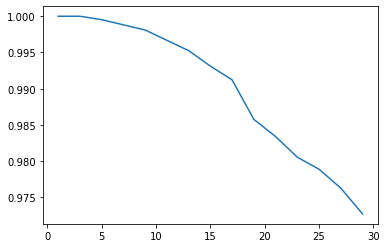

In [11]:
plt.plot(range(1,31,2),np.flip(resKNN))
print(resKNN)

In [12]:
date=dt.datetime.now().strftime("%Y_%m_%d-%H:%M:%S")
filename='saves/KNN.npy'

np.save(filename, np.flip(resKNN))

In [13]:
resKNN = np.load('saves/KNN.npy', allow_pickle=True)

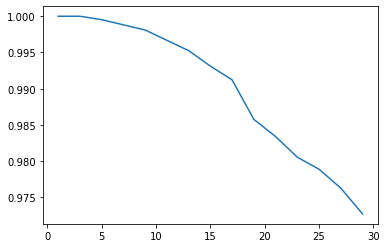

In [14]:
plt.plot(range(1,31,2),resKNN)

In [28]:
print(resKNN)

[0.98101566 0.9829141  0.98504983 0.98694827 0.98766018 0.99074514
 0.99169435 0.99525392 0.99691505 0.99833887 0.99905078 0.99928809
 0.9997627  0.9997627  1.        ]


In [15]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

(33, 33)
[[128   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  1   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 118   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 103]]


Apple Braeburn


<AxesSubplot:>

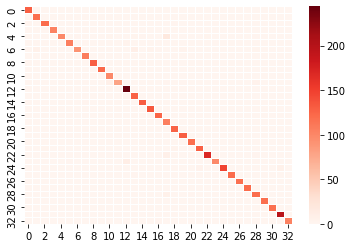

In [17]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
print(categories[0])
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

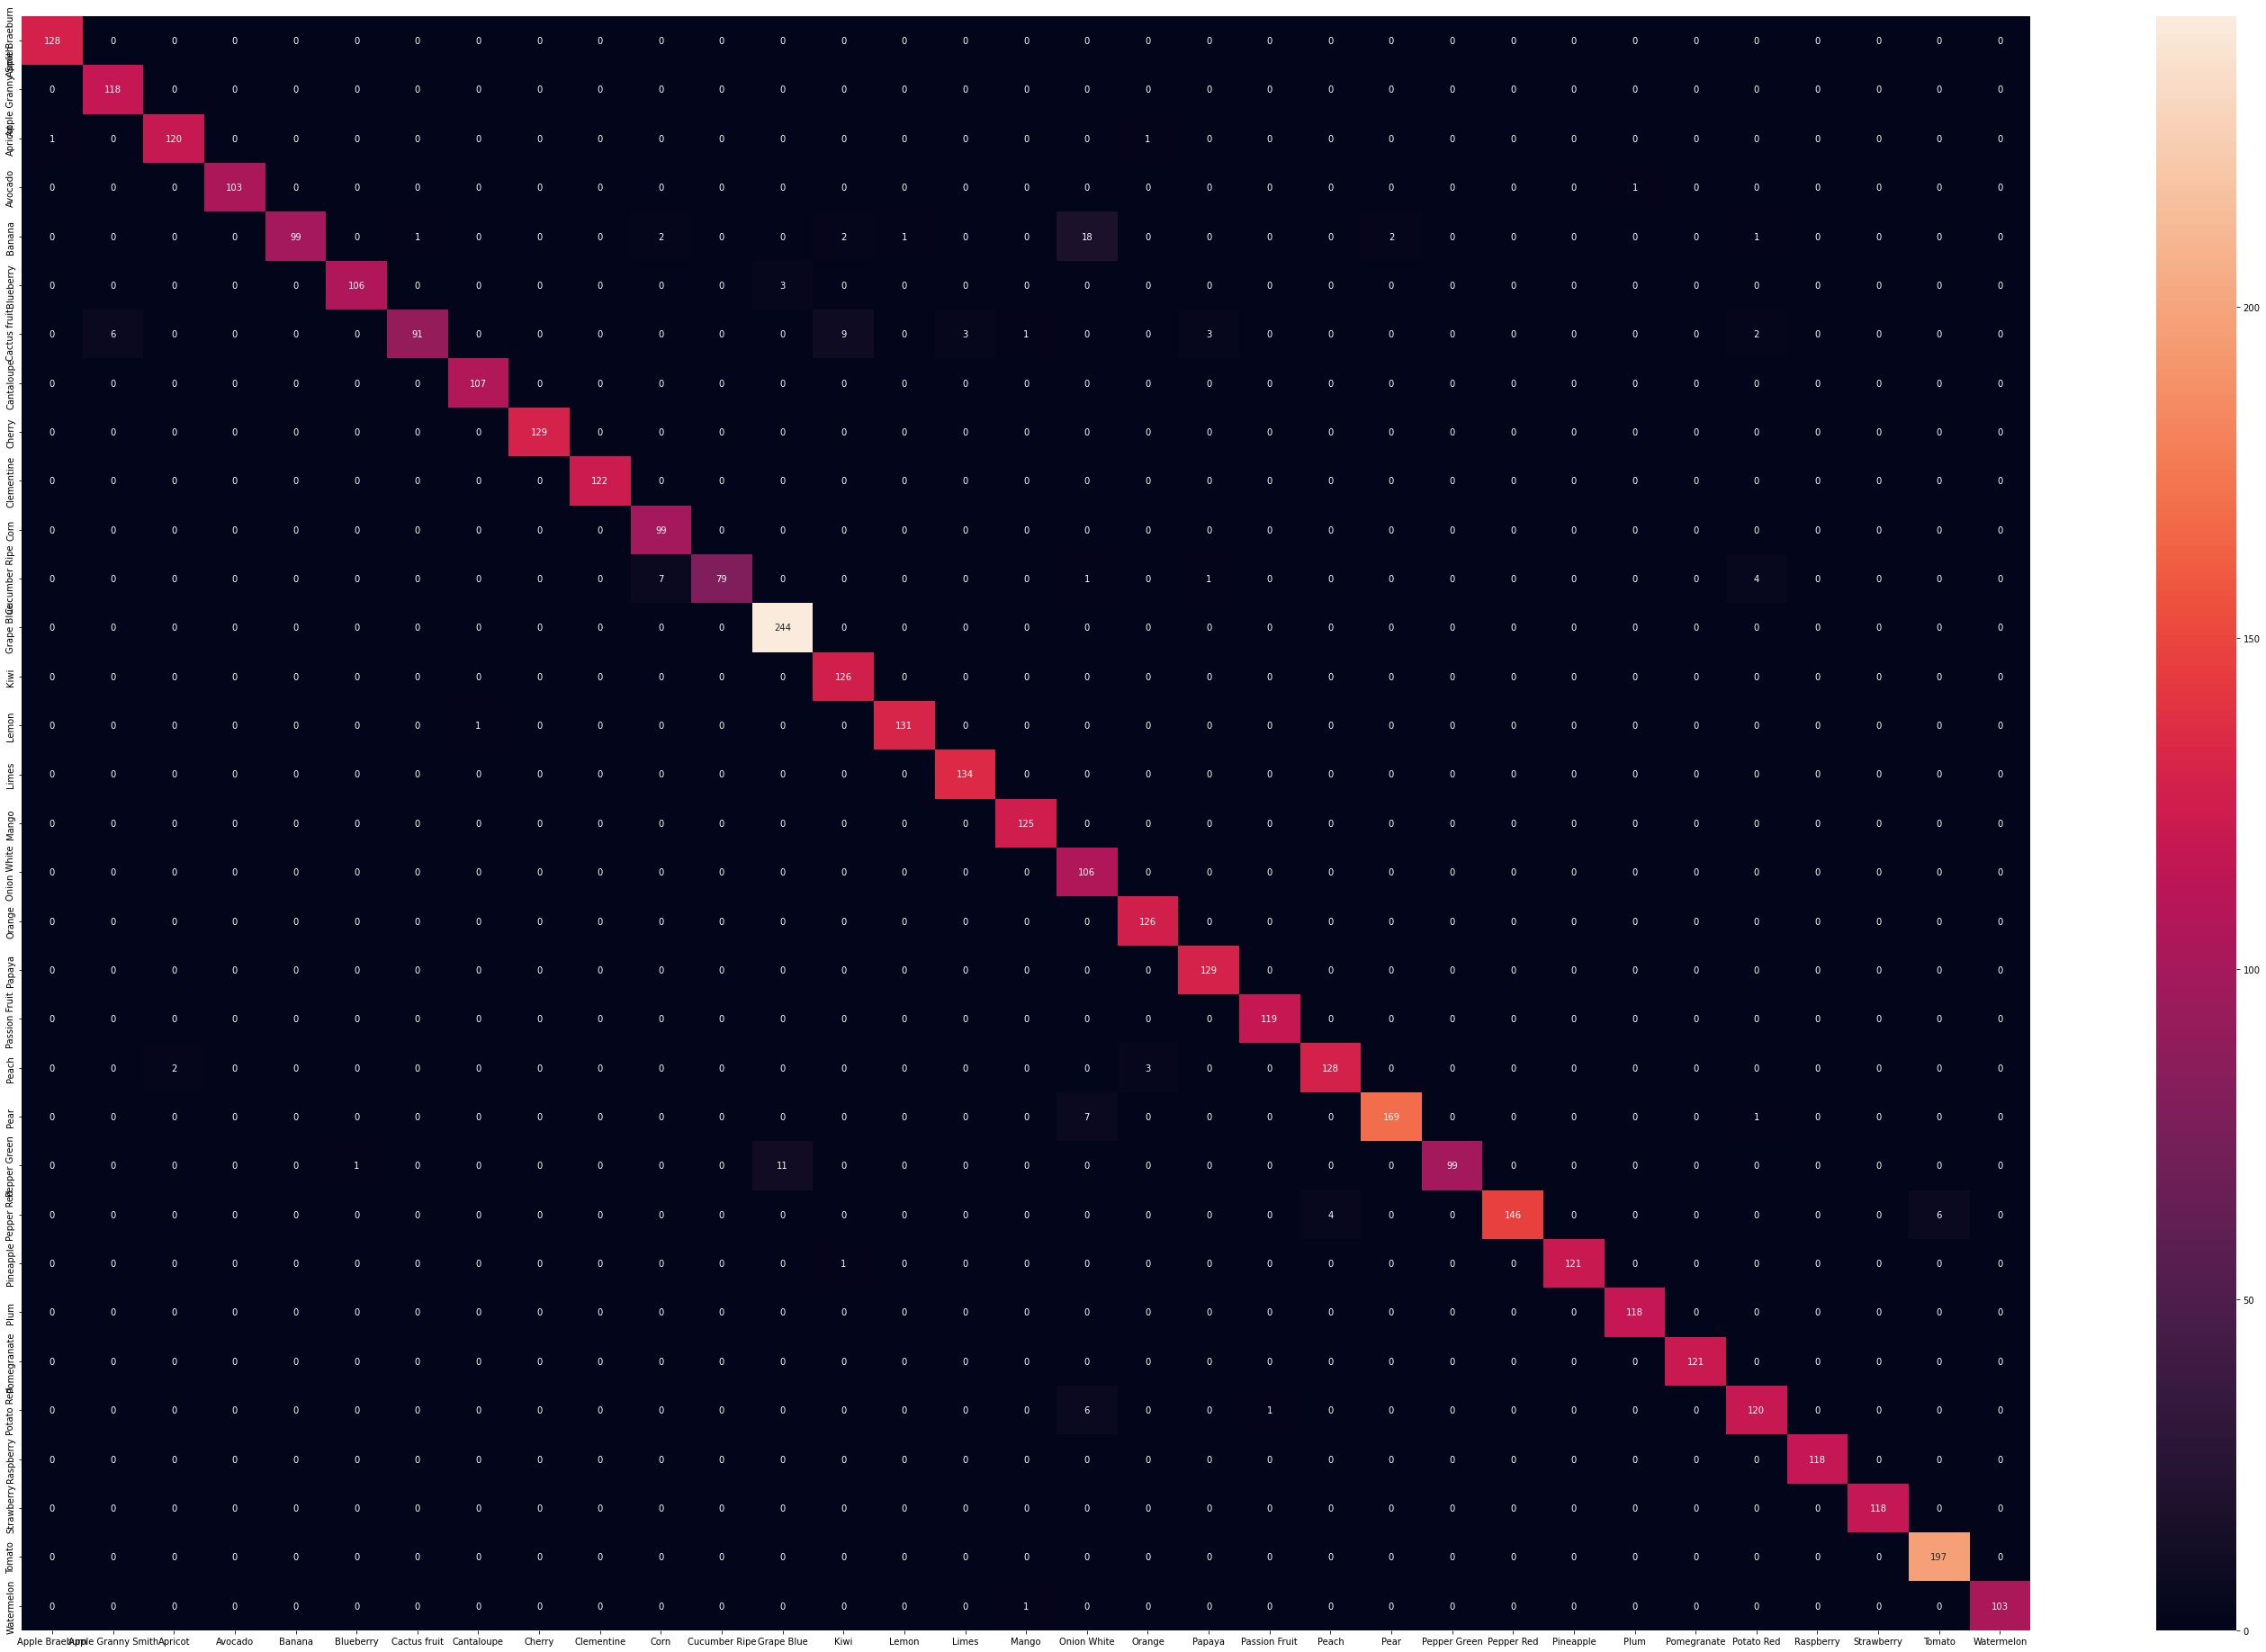

In [16]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f")
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)


# SVM


In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [17]:
resSVM=[]
i=0.001
while i<=1:
    clf=svm.SVC(gamma=i,kernel='poly')
    clf.fit(Xtrain,ytrain)
    ypredit=clf.predict(Xtest)
    resSVM=np.insert(resSVM,0,accuracy_score(ytest,ypredit))
    i=i*10

[1. 1. 1. 1.]


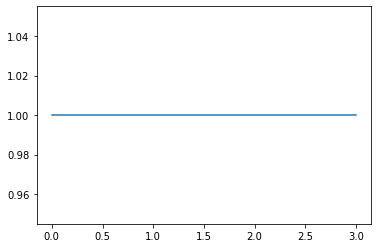

In [18]:
plt.plot(np.flip(resSVM))
print(resSVM)

In [11]:
filename='saves/SVM.npy'
np.save(filename, np.flip(resSVM))

In [12]:
resSVM = np.load('saves/SVM.npy', allow_pickle=True)

[1. 1. 1. 1.]


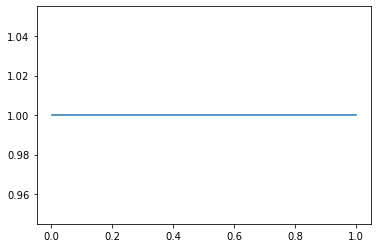

In [14]:
plt.plot([0.001,0.01,0.1,1],resSVM)
print(resSVM)

accuracy : 0.060512577123872806

In [15]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

(33, 33)
[[128   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0 122 ...   0   0   0]
 ...
 [  0   0   0 ... 118   0   0]
 [  0   0   0 ...   0 197   0]
 [  0   0   0 ...   0   0 104]]


Matrice : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

In [ ]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f")
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)


# Decision Tree

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [19]:
resTree=[]
for i in range(5,30,3):
    Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=i)
    clf = Arbre_decision.fit(Xtrain, ytrain)
    ypredit=clf.predict(Xtest)
    resTree=np.insert(resTree,0,accuracy_score(ytest,ypredit))

[0.96226863 0.96226863 0.95633602 0.96108211 0.95467489 0.92287613
 0.80137636 0.61295681 0.34029426]


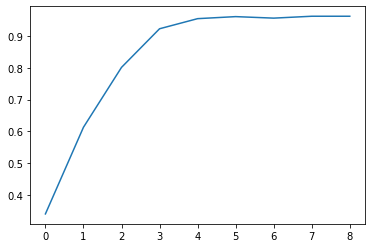

In [20]:
plt.plot(np.flip(resTree))
print(resTree)

In [21]:
date=dt.datetime.now().strftime("%Y_%m_%d-%H:%M:%S")
filename='saves/DecisionTree.npy'
np.save(filename, np.flip(resTree))

In [22]:
resTree = np.load('saves/DecisionTree.npy', allow_pickle=True)

[0.34029426 0.61295681 0.80137636 0.92287613 0.95467489 0.96108211
 0.95633602 0.96226863 0.96226863]


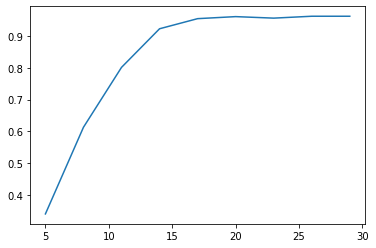

In [23]:
plt.plot(range(5,30,3),resTree)
print(resTree)

In [24]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

(33, 33)
[[123   0   1 ...   0   0   0]
 [  0 114   1 ...   0   0   0]
 [  0   0 120 ...   1   0   0]
 ...
 [  3   0   0 ... 109   2   0]
 [  0   0   0 ...   0 195   0]
 [  0   0   0 ...   0   0  92]]


In [17]:
np.save('saves/mat_DecisionTree.npy',mat_confusion)

<AxesSubplot:>

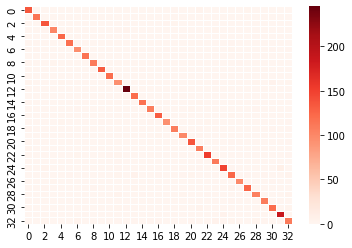

In [18]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

# Autre

In [9]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(Xtrain, ytrain)
predicted = GNB_classifier.predict(Xtest)
accuracy_score(ytest,predicted)

0.9375889890840057

In [11]:
mat_confusion=metrics.confusion_matrix(ytest,predicted)

[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

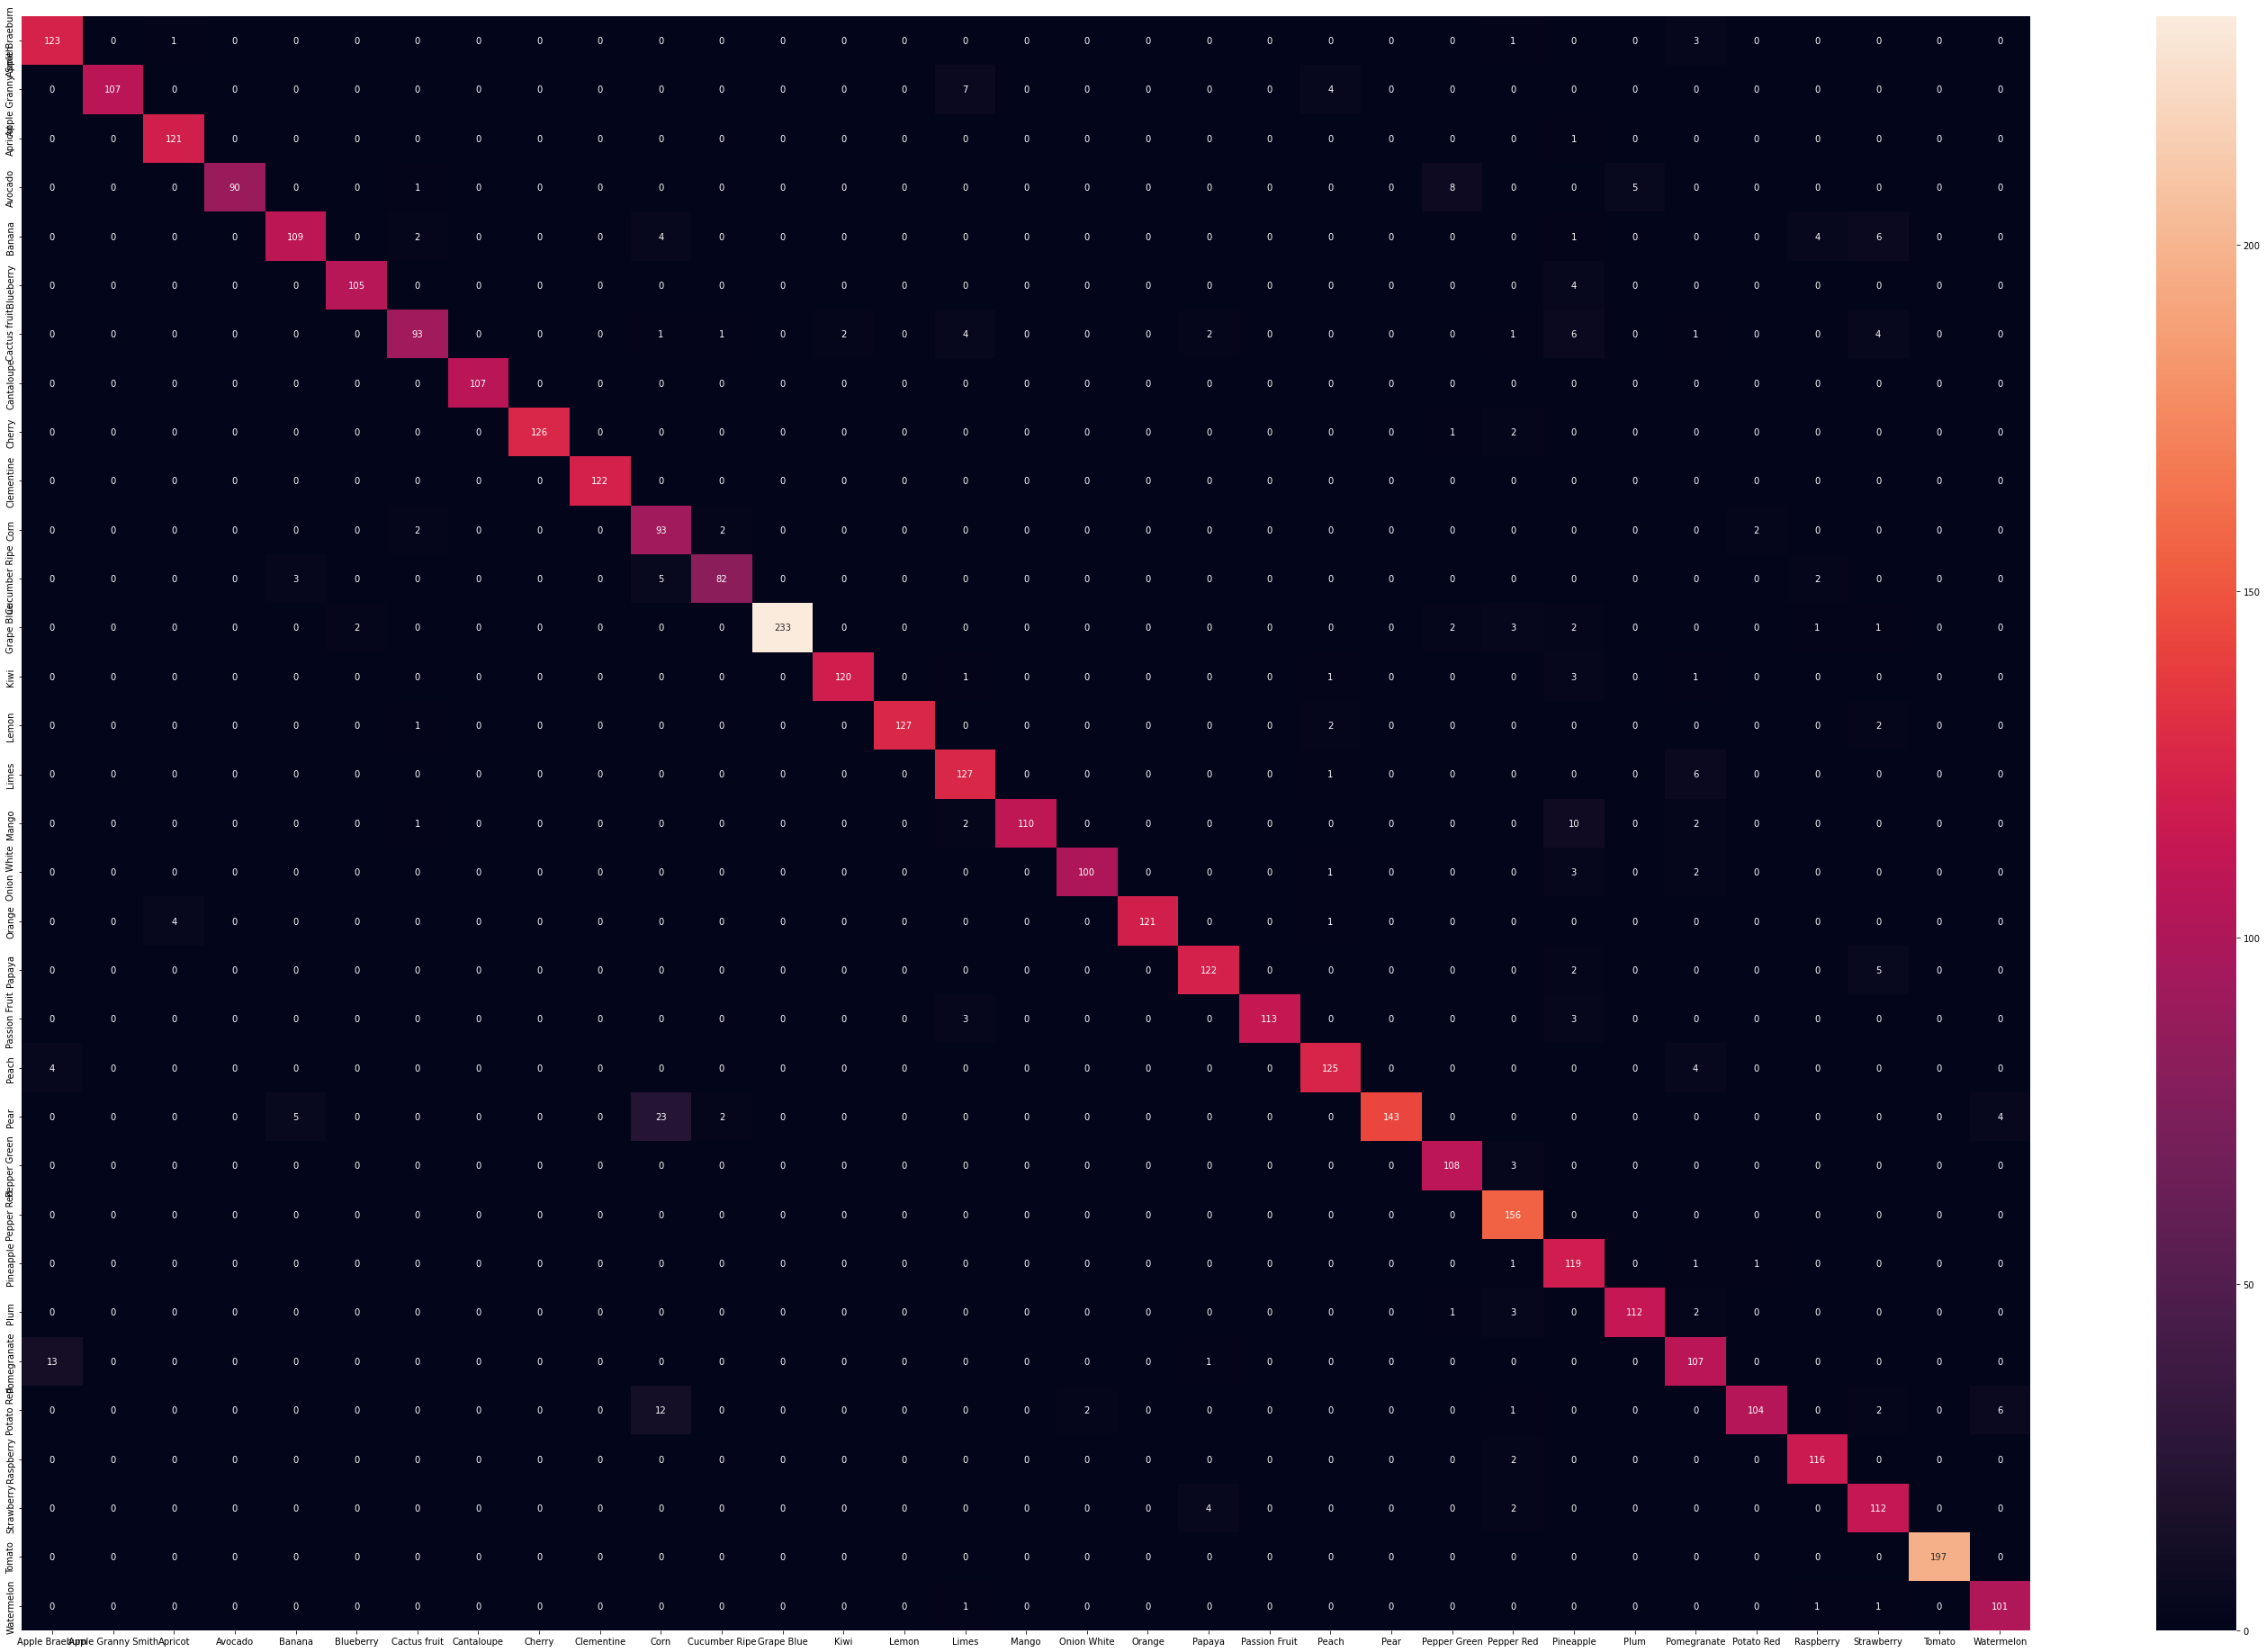

In [12]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f")
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)


In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
classifier=MLPClassifier(hidden_layer_sizes=(150,150,50),solver="lbfgs")
classifier.fit(Xtrain, ytrain)
ypredit=classifier.predict(Xtest)
accuracy_score(ytest,ypredit)


0.9992880873279545

In [15]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)

<AxesSubplot:>

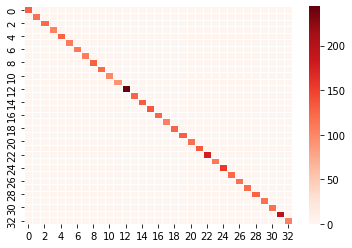

In [16]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

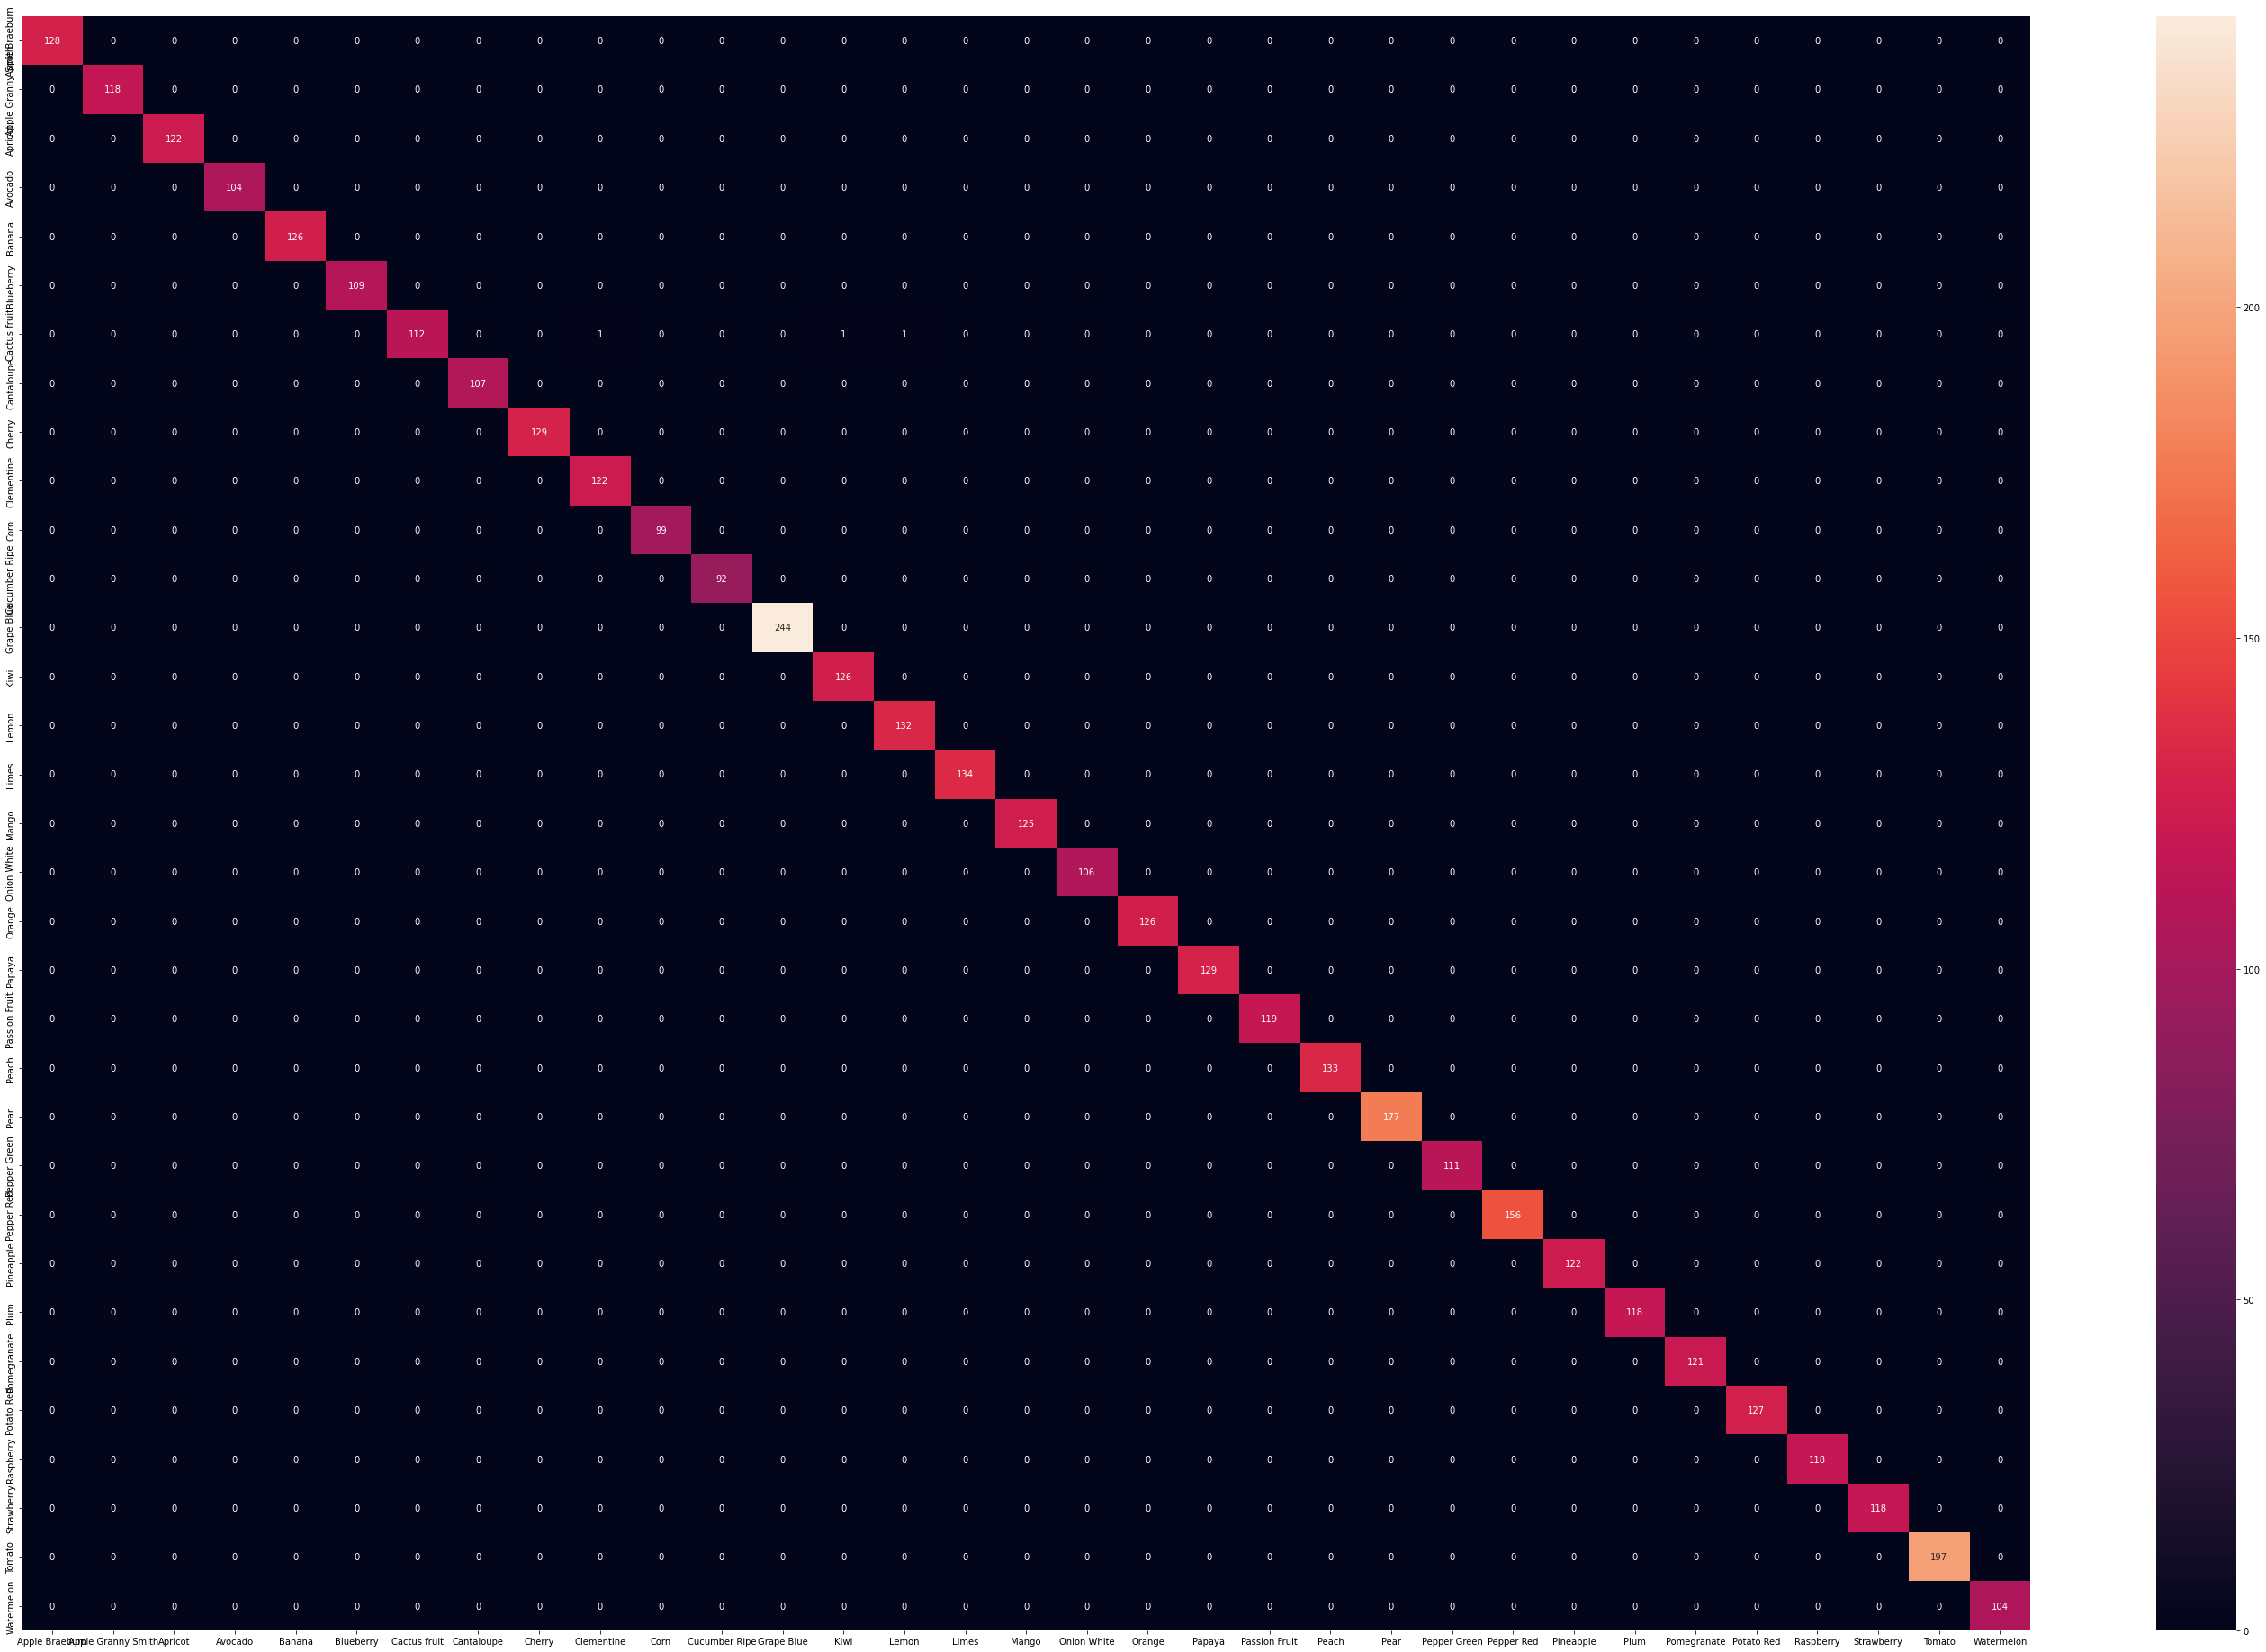

In [17]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f")
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
